In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import yfinance as yf
from pandas import DataFrame

# 데이터 불러오기

In [34]:
estate=pd.read_csv("c:/Archiving/IMDGB/step02_ds_basic/dataset/seoul_real_estate.csv")
estate.head()

,ACC_YEAR,SGG_CD,SGG_NM,BJDONG_CD,BJDONG_NM,LAND_GBN,LAND_GBN_NM,BONBEON,BUBEON,BLDG_NM,...,OBJ_AMT,BLDG_AREA,TOT_AREA,FLOOR,RIGHT_GBN,CNTL_YMD,BUILD_YEAR,HOUSE_TYPE,REQ_GBN,RDEALER_LAWDNM
0,2023,11650,서초구,10800,서초동,1.0,대지,1328.0,11.0,대우도씨에빛2,...,38500,38.81,50.85,14.0,NaN,NaN,2005.0,오피스텔,중개거래,서울 서초구
1,2023,11620,관악구,10200,신림동,1.0,대지,1567.0,25.0,태성휴빌3차,...,17200,24.76,15.99,6.0,NaN,NaN,2015.0,연립다세대,직거래,NaN
2,2023,11530,구로구,10200,구로동,1.0,대지,44.0,8.0,비즈트위트 오렌지,...,12000,17.81,26.91,18.0,NaN,NaN,2013.0,오피스텔,직거래,NaN
3,2023,11410,서대문구,11800,홍은동,NaN,NaN,NaN,NaN,NaN,...,45000,39.67,142.00,0.0,NaN,NaN,1988.0,단독다가구,중개거래,서울 서대문구
4,2023,11380,은평구,11400,진관동,1.0,대지,100.0,3.0,아이파크 포레스트 게이트,...,14400,24.91,35.78,24.0,NaN,NaN,2013.0,오피스텔,중개거래,서울 은평구


# 데이터 타입 변환 (object to int)
- 사용자 정의 함수로 하려 한다.
- 곧바로 쓰지말고, 먼저 하나만 int로 바꾸는 함수를 써서 확인하고, 나오면 사용자 정의 함수로 선언하자

In [35]:
# 03/02 , 03/03 컬럼만 int 형으로 변경
# 데이터프레임 생성
data = [
    ["1,000", "1,100", '1,510'],
    ["1,410", "1,420", '1,790'],
    ["850", "900", '1,185'],
]
columns = ["03/02", "03/03", "03/04"]
df = pd.DataFrame(data=data, columns=columns)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   03/02   3 non-null      object
 1   03/03   3 non-null      object
 2   03/04   3 non-null      object
dtypes: object(3)
memory usage: 204.0+ bytes


In [36]:
x = "1,000" # 애를 먼저 int로 바꿔보자
x.replace("," ,"") # 먼저 콤마를 지운다.

'1000'

In [37]:
int(x.replace(",","")) # 타입 변환, int로 변경된 것이 확인되면 사용자 정의 함수로 사용ㄱ

1000

In [38]:
# 사용자 정의 함수
def rm_comma(x):
    return int(x.replace(",",""))

# 사용자 정의 함수 잘 돌아가는 지 확인
y = "1,000"
print(rm_comma(y))

1000


In [39]:
df["03/02"] = df["03/02"].apply(rm_comma)
df["03/03"] = df["03/03"].apply(rm_comma)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   03/02   3 non-null      int64 
 1   03/03   3 non-null      int64 
 2   03/04   3 non-null      object
dtypes: int64(2), object(1)
memory usage: 204.0+ bytes


In [40]:
# sol2 / methods 활용
data = [
    ["1,000", "1,100", '1,510'],
    ["1,410", "1,420", '1,790'],
    ["850", "900", '1,185'],
]
columns = ["03/02", "03/03", "03/04"]
df = DataFrame(data=data, columns=columns) 
df2 = df.copy()
df2['03/02'] = df2['03/02'].str.replace(',', '').astype(int)
df2['03/03'] = df2['03/03'].str.replace(',', '').astype(int)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   03/02   3 non-null      int64 
 1   03/03   3 non-null      int64 
 2   03/04   3 non-null      object
dtypes: int64(2), object(1)
memory usage: 204.0+ bytes


# 데이터 시각화 1

In [41]:
sns.__version__ 

'0.13.2'

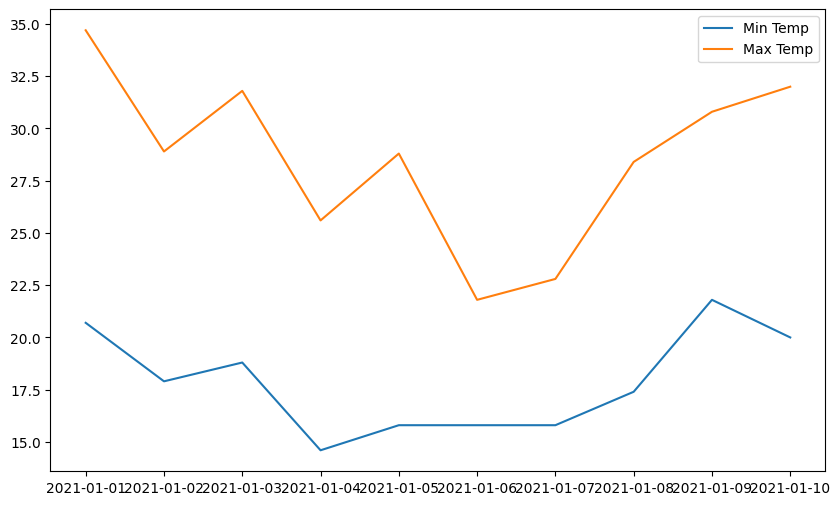

In [42]:
dates = [
    '2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04', '2021-01-05',
    '2021-01-06', '2021-01-07', '2021-01-08', '2021-01-09', '2021-01-10'
] 
# 지금 자료형이 list임. matpolitlib은 기본적으로 list를 받음. dataframe으로 작업하던 걸 list로 변환해야함. 
min_temperature = [20.7, 17.9, 18.8, 14.6, 15.8, 15.8, 15.8, 17.4, 21.8, 20.0]
max_temperature = [34.7, 28.9, 31.8, 25.6, 28.8, 21.8, 22.8, 28.4, 30.8, 32.0]


fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(10, 6))
ax.plot(dates, min_temperature, label = "Min Temp")
ax.plot(dates, max_temperature, label = "Max Temp")
ax.legend()
plt.show()

In [43]:
# Figure (차트사이즈)
# Axes (그래프 라인들 의미함 <- 이해 어렵)
print(fig)
print(ax)

Figure(1000x600)
Axes(0.125,0.11;0.775x0.77)


# 데이터 시각화 2 | Yahoo API에서 무료 주식 데이터 가져오기
- https://github.com/ranaroussi/yfinance

In [44]:
# import yfinance as yf

In [45]:
apple = yf.download("AAPL", start = "2020-01-01", end="2024-09-30")
nvidia = yf.download("NVDA", start = "2020-01-01", end="2024-09-30")
intel = yf.download("INTC", start="2020-01-01", end = "2024-09-30")
amazon = yf.download("AMZN", start="2020-01-01", end = "2024-09-30")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


## matplotlib

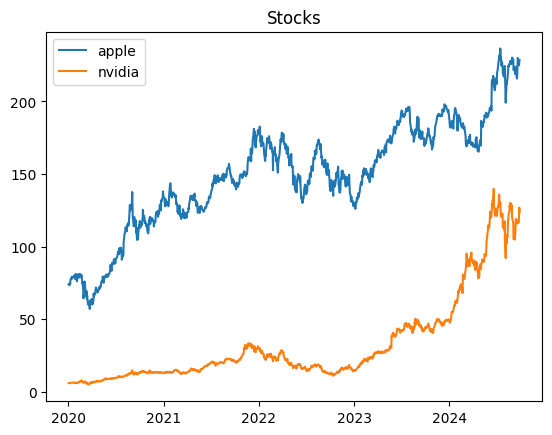

In [46]:
# 그래프 1
fig, ax = plt.subplots()
ax.plot(apple['Open'], label = 'apple')
ax.plot(nvidia['Open'], label = 'nvidia')
ax.set_title('Stocks')
ax.legend()
plt.show()

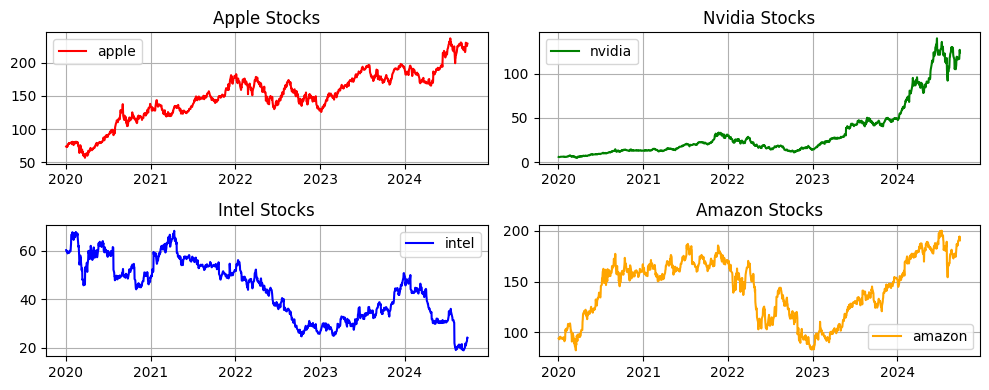

In [47]:
# 그래프 2

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,4))
# nrows, ncols로 그래프 몇개 생성할 지


ax[0, 0].plot(apple['Open'], label = 'apple', color ='red')
ax[0, 1].plot(nvidia['Open'], label = 'nvidia' , color='green')
ax[1,0].plot(intel['Open'], label = 'intel', color ='blue')
ax[1, 1].plot(amazon['Open'], label = 'amazon' , color='orange')

ax[0, 0].set_title('Apple Stocks')
ax[0, 1].set_title('Nvidia Stocks')
ax[1, 0].set_title('Intel Stocks')
ax[1, 1].set_title('Amazon Stocks')

ax[0, 0].legend()
ax[0, 1].legend()
ax[1, 0].legend()
ax[1, 1].legend()

fig.tight_layout()

ax[0, 0].grid()
ax[0, 1].grid()
ax[1, 0].grid()
ax[1, 1].grid()
plt.savefig('myStocks.png')
plt.show()

## seaborn

<Axes: xlabel='Date', ylabel='Open'>

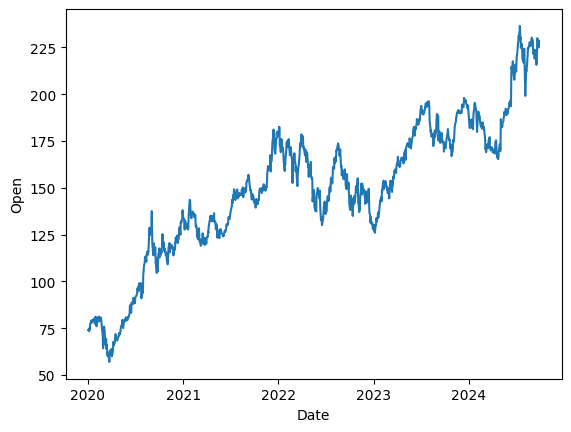

In [48]:
sns.lineplot(apple['Open'])

In [49]:
apple2=apple.reset_index()
apple2.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,74.059998,75.150002,73.797501,75.087502,72.876106,135480400
1,2020-01-03,74.287498,75.144997,74.125000,74.357498,72.167603,146322800
2,2020-01-06,73.447502,74.989998,73.187500,74.949997,72.742638,118387200
3,2020-01-07,74.959999,75.224998,74.370003,74.597504,72.400536,108872000
4,2020-01-08,74.290001,76.110001,74.290001,75.797501,73.565208,132079200


# 연습문제 1
## 자치구별 부동산 거래 건수 비교 (Bar Chart)
- hint : matplotlib.pyplot.bar
- SGG_NM을 기준으로 각 자치구별로 부동산 거래가 몇 건 이루어졌는지 bar 차트로 나타내세요. 

In [50]:
estate.head()

,ACC_YEAR,SGG_CD,SGG_NM,BJDONG_CD,BJDONG_NM,LAND_GBN,LAND_GBN_NM,BONBEON,BUBEON,BLDG_NM,...,OBJ_AMT,BLDG_AREA,TOT_AREA,FLOOR,RIGHT_GBN,CNTL_YMD,BUILD_YEAR,HOUSE_TYPE,REQ_GBN,RDEALER_LAWDNM
0,2023,11650,서초구,10800,서초동,1.0,대지,1328.0,11.0,대우도씨에빛2,...,38500,38.81,50.85,14.0,NaN,NaN,2005.0,오피스텔,중개거래,서울 서초구
1,2023,11620,관악구,10200,신림동,1.0,대지,1567.0,25.0,태성휴빌3차,...,17200,24.76,15.99,6.0,NaN,NaN,2015.0,연립다세대,직거래,NaN
2,2023,11530,구로구,10200,구로동,1.0,대지,44.0,8.0,비즈트위트 오렌지,...,12000,17.81,26.91,18.0,NaN,NaN,2013.0,오피스텔,직거래,NaN
3,2023,11410,서대문구,11800,홍은동,NaN,NaN,NaN,NaN,NaN,...,45000,39.67,142.00,0.0,NaN,NaN,1988.0,단독다가구,중개거래,서울 서대문구
4,2023,11380,은평구,11400,진관동,1.0,대지,100.0,3.0,아이파크 포레스트 게이트,...,14400,24.91,35.78,24.0,NaN,NaN,2013.0,오피스텔,중개거래,서울 은평구


### matplotlib

In [51]:
estate1=estate.copy()
estate1.head()

,ACC_YEAR,SGG_CD,SGG_NM,BJDONG_CD,BJDONG_NM,LAND_GBN,LAND_GBN_NM,BONBEON,BUBEON,BLDG_NM,...,OBJ_AMT,BLDG_AREA,TOT_AREA,FLOOR,RIGHT_GBN,CNTL_YMD,BUILD_YEAR,HOUSE_TYPE,REQ_GBN,RDEALER_LAWDNM
0,2023,11650,서초구,10800,서초동,1.0,대지,1328.0,11.0,대우도씨에빛2,...,38500,38.81,50.85,14.0,NaN,NaN,2005.0,오피스텔,중개거래,서울 서초구
1,2023,11620,관악구,10200,신림동,1.0,대지,1567.0,25.0,태성휴빌3차,...,17200,24.76,15.99,6.0,NaN,NaN,2015.0,연립다세대,직거래,NaN
2,2023,11530,구로구,10200,구로동,1.0,대지,44.0,8.0,비즈트위트 오렌지,...,12000,17.81,26.91,18.0,NaN,NaN,2013.0,오피스텔,직거래,NaN
3,2023,11410,서대문구,11800,홍은동,NaN,NaN,NaN,NaN,NaN,...,45000,39.67,142.00,0.0,NaN,NaN,1988.0,단독다가구,중개거래,서울 서대문구
4,2023,11380,은평구,11400,진관동,1.0,대지,100.0,3.0,아이파크 포레스트 게이트,...,14400,24.91,35.78,24.0,NaN,NaN,2013.0,오피스텔,중개거래,서울 은평구


### seaborn

## 건물 면적 대비 거래 가격 관계
- BLDG_AREA와 OBJ_AMT 간의 관계를 산점도로 시각화하세요.
- matplotlib.pyplot.scatter

### matplotlib

### seaborn